In [28]:
# Obstacle-Aware Navigation Demo

# This notebook demonstrates:
# 1. Obstacle detection using YOLOv8
# 2. Rule-based navigation logic
# 3. Visualization of results
# Step 1: Detect obstacles
# Step 2: Decide navigation instruction
# Step 3: Visualize output


In [25]:
!pip install ultralytics opencv-python

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 578, in _determine_conflicts
    return check_install_conflicts(to_install)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/operations/check.py", line 101, in check_install_conflicts
    package_set, _ = create_package_set_from_installed()
              

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 403.5ms
Speed: 15.7ms preprocess, 403.5ms inference, 46.4ms postprocess per image at shape (1, 3, 640, 480)


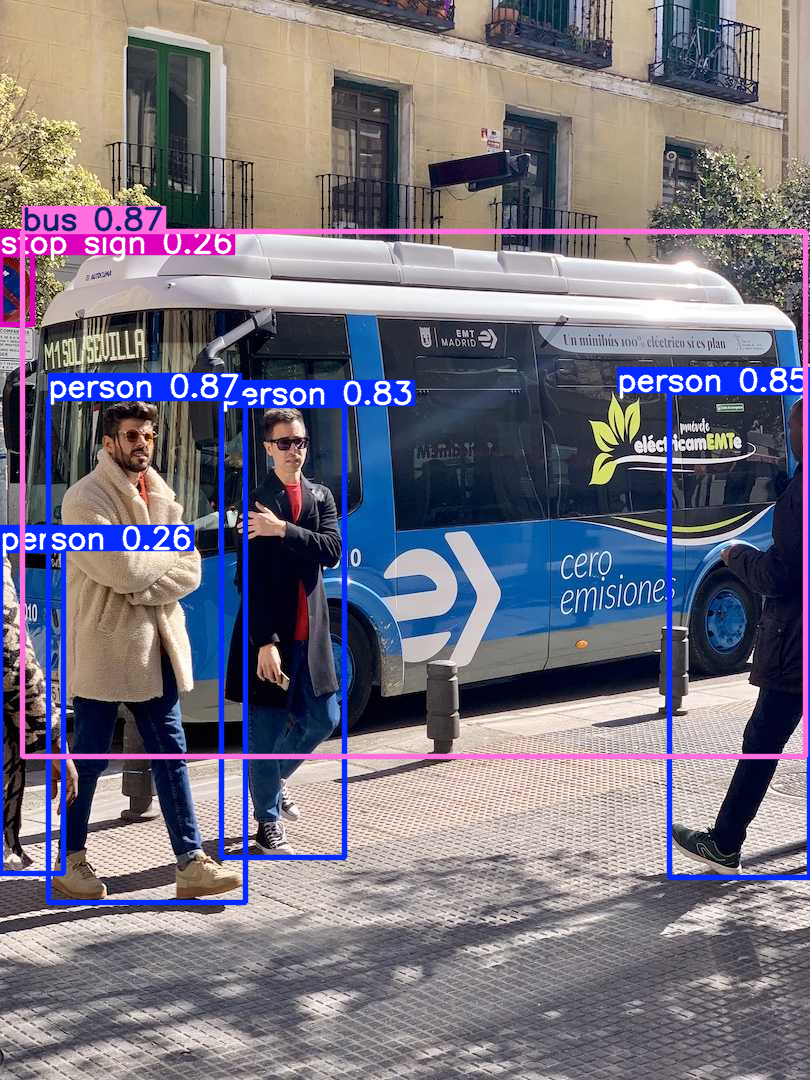

In [9]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
results = model("https://ultralytics.com/images/bus.jpg")

results[0].show()


In [17]:
for box in results[0].boxes:
    print(box.xyxy, box.cls, box.conf)


tensor([[ 22.8713, 231.2773, 805.0027, 756.8403]]) tensor([5.]) tensor([0.8734])
tensor([[ 48.5505, 398.5522, 245.3456, 902.7027]]) tensor([0.]) tensor([0.8657])
tensor([[669.4729, 392.1861, 809.7202, 877.0355]]) tensor([0.]) tensor([0.8528])
tensor([[221.5173, 405.7986, 344.9706, 857.5366]]) tensor([0.]) tensor([0.8252])
tensor([[  0.0000, 550.5250,  63.0070, 873.4429]]) tensor([0.]) tensor([0.2611])
tensor([[5.8171e-02, 2.5446e+02, 3.2557e+01, 3.2487e+02]]) tensor([11.]) tensor([0.2551])


In [10]:
from ultralytics import YOLO

class ObstacleDetector:
    """
    Detects obstacles in an image using YOLOv8.
    """

    def __init__(self, model_path="yolov8n.pt"):
        self.model = YOLO(model_path)

    def detect(self, image_path):
        """
        Runs object detection on an image and returns bounding boxes.
        """
        results = self.model(image_path)[0]
        obstacles = []

        for box in results.boxes:
            x1, y1, x2, y2 = box.xyxy[0]
            obstacles.append({
                "bbox": (
                    int(x1),
                    int(y1),
                    int(x2),
                    int(y2)
                )
            })

        return obstacles
detector = ObstacleDetector()
obstacles = detector.detect("https://ultralytics.com/images/bus.jpg")

print(obstacles[:3])


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 426.1ms
Speed: 12.9ms preprocess, 426.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)
[{'bbox': (22, 231, 805, 756)}, {'bbox': (48, 398, 245, 902)}, {'bbox': (669, 392, 809, 877)}]


In [13]:
def decide_direction(obstacles, image_width):
    """
    Decide navigation instruction based on obstacle positions.
    """

    left, center, right = 0, 0, 0

    for obs in obstacles:
        x1, _, x2, _ = obs["bbox"]
        cx = (x1 + x2) / 2

        if cx < image_width / 3:
            left += 1
        elif cx < 2 * image_width / 3:
            center += 1
        else:
            right += 1

    if center == 0:
        return "Move forward"
    elif left < right:
        return "Move slightly left"
    else:
        return "Move slightly right"


In [16]:
instruction = decide_direction(obstacles, image_width=640)
print("Instruction:", instruction)


Instruction: Move slightly right


In [12]:
class NavigationEngine:
    """
    Simple rule-based navigation logic based on obstacle positions.
    """

    def __init__(self, image_width):
        self.image_width = image_width

    def decide(self, obstacles):
        left, center, right = 0, 0, 0

        for obs in obstacles:
            x1, _, x2, _ = obs["bbox"]
            cx = (x1 + x2) / 2

            if cx < self.image_width / 3:
                left += 1
            elif cx < 2 * self.image_width / 3:
                center += 1
            else:
                right += 1

        if center == 0:
            return "Move forward"
        elif left < right:
            return "Move slightly left"
        else:
            return "Move slightly right"


In [15]:
detector = ObstacleDetector()
navigator = NavigationEngine(image_width=640)

obstacles = detector.detect("https://ultralytics.com/images/bus.jpg")
instruction = navigator.decide(obstacles)

print("Instruction:", instruction)


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 197.8ms
Speed: 4.9ms preprocess, 197.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)
Instruction: Move slightly right


In [1]:
!pip install matplotlib


In [2]:
import cv2
from matplotlib import pyplot as plt

def visualize(image_path, obstacles):
    img = cv2.imread(image_path)

    for obs in obstacles:
        x1, y1, x2, y2 = obs["bbox"]
        cv2.rectangle(
            img,
            (x1, y1),
            (x2, y2),
            (0, 255, 0),
            2
        )

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis("off")
    plt.show()



Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 208.1ms
Speed: 6.0ms preprocess, 208.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)
Instruction: Move slightly right


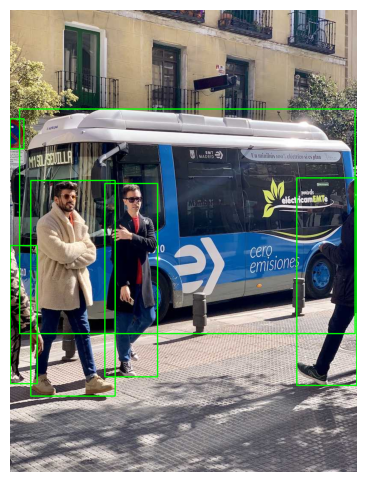

In [19]:
image_url = "https://ultralytics.com/images/bus.jpg"
image_path = "bus.jpg"   # <-- ВАЖНО

detector = ObstacleDetector()
navigator = NavigationEngine(image_width=640)

obstacles = detector.detect(image_url)
instruction = navigator.decide(obstacles)

print("Instruction:", instruction)
visualize(image_path, obstacles)


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 197.1ms
Speed: 8.0ms preprocess, 197.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)
Instruction: Move slightly right


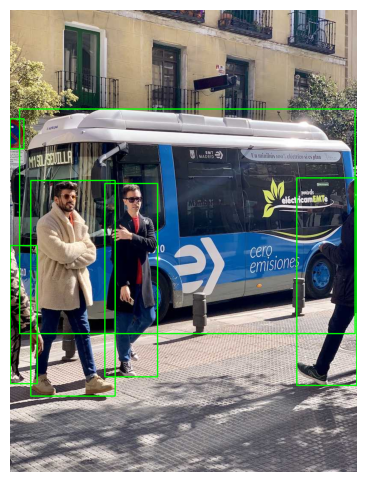

In [20]:
image_url = "https://ultralytics.com/images/bus.jpg"
image_path = "bus.jpg"

detector = ObstacleDetector()
navigator = NavigationEngine(image_width=640)

obstacles = detector.detect(image_url)
instruction = navigator.decide(obstacles)

print("Instruction:", instruction)
visualize(image_path, obstacles)


Test image 1

Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 196.0ms
Speed: 6.7ms preprocess, 196.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)
Instruction: Move slightly right


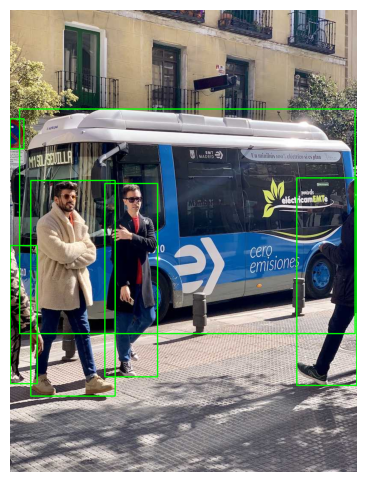


Test image 2

Found https://ultralytics.com/images/zidane.jpg locally at zidane.jpg
image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 174.1ms
Speed: 4.2ms preprocess, 174.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)
Instruction: Move forward


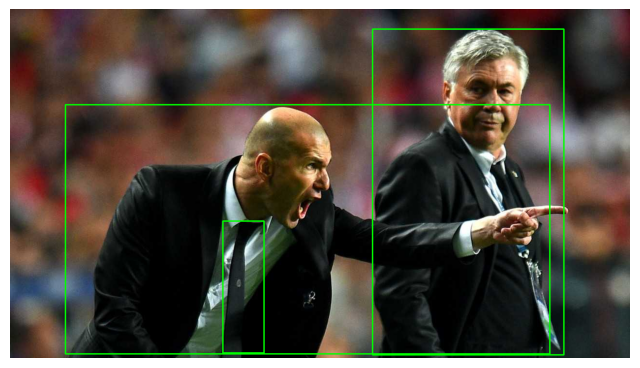

In [24]:
images = [
    "https://ultralytics.com/images/bus.jpg",
    "https://ultralytics.com/images/zidane.jpg"
]
detector = ObstacleDetector()
navigator = NavigationEngine(image_width=640)

for idx, img_url in enumerate(images):
    print(f"\nTest image {idx+1}")

    try:
        obstacles = detector.detect(img_url)

        if len(obstacles) == 0:
            print("No obstacles detected, skipping visualization.")
            continue

        instruction = navigator.decide(obstacles)
        local_path = img_url.split("/")[-1]

        print("Instruction:", instruction)
        visualize(local_path, obstacles)

    except Exception as e:
        print("Error processing image:", e)
